In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
data = pd.read_csv("benchmark_results/2023-01-08_03:08:31.712434.csv", header=None)

In [6]:
data.columns = ["dataloader", "iteration", "batch_size", "num_workers", "clock_time", "process_time", "clip_count"]

In [7]:
clock_by_combo = data.groupby("dataloader").agg({
    "clock_time":"mean",
    "clip_count":"sum",
})

In [8]:
clock_by_combo

,clock_time,clip_count
dataloader,,
dali,69.782383,2688
dali_dali,71.209037,2712
dali_pytorch,74.402721,3024
pytorch,101.406163,3120


In [16]:
clock_by_combo.index.size

4

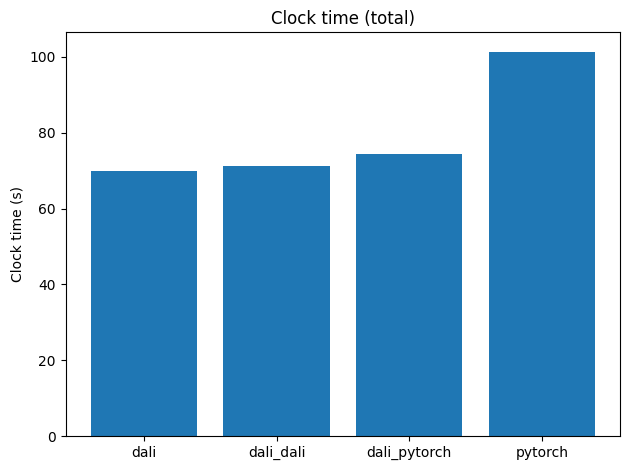

In [20]:
width = 0.1

x = np.arange(clock_by_combo.index.size)

fig, ax = plt.subplots()

rects = []

ax.bar(x, clock_by_combo.clock_time)

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Clock time (s)')
ax.set_title('Clock time (total)')
labels = clock_by_combo.index
ax.set_xticks(x, labels)

fig.tight_layout()

plt.show()

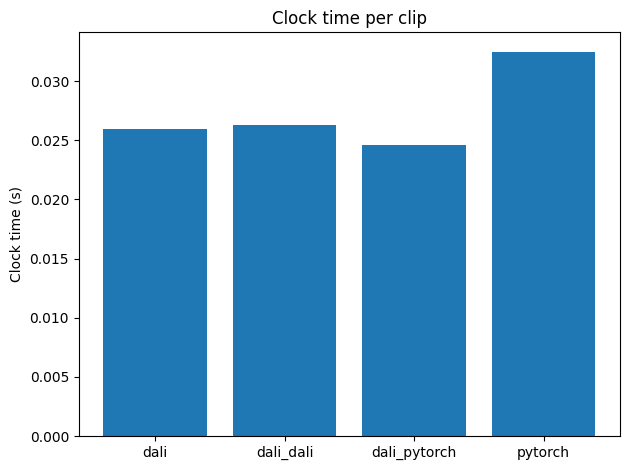

In [21]:
width = 0.1

x = np.arange(clock_by_combo.index.size)

fig, ax = plt.subplots()

rects = []

ax.bar(x, clock_by_combo.clock_time / clock_by_combo.clip_count)

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Clock time (s)')
ax.set_title('Clock time per clip')
labels = clock_by_combo.index
ax.set_xticks(x, labels)

fig.tight_layout()

plt.show()